In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') # removes warnings

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

target = train[train.columns.to_list()[-1]]
test_target = pd.read_csv("sample_submission.csv")
test_target.drop("Id",axis=1,inplace=True)

train.drop(train.columns.to_list()[-1],axis=1,inplace=True)
train_id = train['Id']
test_id = test['Id']
train.drop("Id",axis=1,inplace=True)
test.drop("Id",axis=1,inplace=True)



(array([ 35., 248., 459., 513., 140.,  43.,  14.,   2.,   2.,   3.]),
 array([135751.31889282, 150340.58461521, 164929.85033761, 179519.11606001,
        194108.3817824 , 208697.6475048 , 223286.9132272 , 237876.1789496 ,
        252465.44467199, 267054.71039439, 281643.97611679]),
 <BarContainer object of 10 artists>)

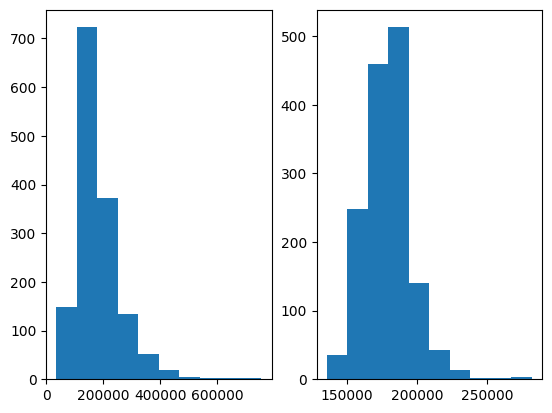

In [3]:
import matplotlib.pyplot as plt

fig , ax  = plt.subplots(1,2)

ax[0].hist(target)
ax[1].hist(test_target) #  looks very diffrent 

In [4]:
test_target.describe()

,SalePrice
count,1459.000000
mean,179183.918243
std,16518.303051
min,135751.318893
25%,168703.011202
50%,179208.665698
75%,186789.409363
max,281643.976117


In [5]:
target.describe() # very diffrent 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
target = np.log1p(target)
test_target = np.log1p(test_target)

(array([ 18.,  92., 259., 501., 402., 134.,  37.,   9.,   4.,   3.]),
 array([11.81858732, 11.89156885, 11.96455038, 12.03753191, 12.11051343,
        12.18349496, 12.25647649, 12.32945802, 12.40243955, 12.47542108,
        12.54840261]),
 <BarContainer object of 10 artists>)

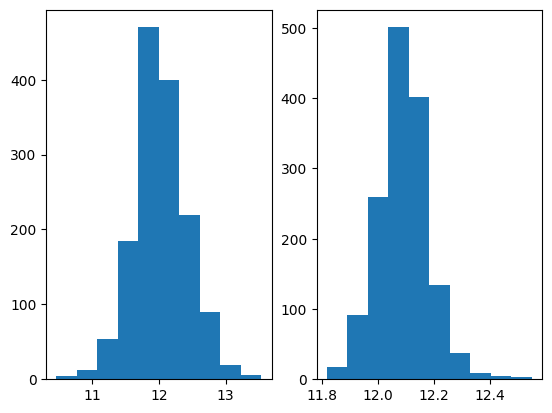

In [7]:
import matplotlib.pyplot as plt

fig , ax  = plt.subplots(1,2)

ax[0].hist(target)
ax[1].hist(test_target) #  much better  

In [8]:
list(train.columns)

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [9]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [10]:
train.isna().sum()[train.isna().sum() > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [11]:
test.isna().sum()[train.isna().sum() > 0]

LotFrontage    227
MasVnrArea      15
GarageYrBlt     78
dtype: int64

In [12]:
combined = pd.concat([train,test],axis=0)

In [13]:
combined['GarageYrBlt'].fillna(combined['YearBuilt'], inplace=True)

In [14]:
combined.isna().sum()[train.isna().sum() > 0]

LotFrontage    486
MasVnrArea      23
GarageYrBlt      0
dtype: int64

In [15]:
from sklearn.impute import SimpleImputer
 
mean_imputer=SimpleImputer()
mean_imputer.fit(train)

combined = pd.DataFrame(mean_imputer.transform(combined))

In [16]:
from sklearn.preprocessing import MinMaxScaler
col_num_h = combined.describe().T[combined.describe().T['max'] > 300].index.to_list()
col_num_m = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'RemodAfterBuilt']
col_num_l = combined.describe().T[combined.describe().T['max'] <= 15].index.to_list()

In [17]:
# Min-max scale col_num_m and col_num_l
scaler = MinMaxScaler()
combined= pd.DataFrame(scaler.fit_transform(combined))
print(combined.describe().T[['mean', 'std', 'min', 'max']].sort_values(by='std', ascending=False))

         mean       std  min  max
112  0.503940  0.500070  0.0  1.0
227  0.511134  0.499962  0.0  1.0
212  0.511477  0.499954  0.0  1.0
178  0.448099  0.497384  0.0  1.0
185  0.439534  0.496415  0.0  1.0
..        ...       ...  ...  ...
139  0.000685  0.018506  0.0  1.0
272  0.000685  0.018506  0.0  1.0
128  0.000685  0.018506  0.0  1.0
126  0.000685  0.018506  0.0  1.0
103  0.000685  0.018506  0.0  1.0

[288 rows x 4 columns]


In [18]:
combined.isna().sum()[combined.isna().sum() > 0]

Series([], dtype: int64)

In [19]:
# Convert all bool to float, True to 1, False to 0
combined = combined.astype(float)

In [20]:
test = combined.iloc[-len(test_id):, :]
train = combined.iloc[:-len(test_id), :]
train[target] = target

In [21]:
X = train.drop(target, axis=1)
y = target

x_test = test
y_test = test_target

In [22]:
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [23]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [24]:

model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[X.shape[1]]),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1)
])

In [25]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=128, restore_best_weights=True)

In [26]:
huber = keras.losses.Huber(delta=0.05)
model.compile(loss=huber, optimizer='adam')

In [27]:
history = model.fit(X, y,
                    batch_size=128,
                    epochs=4000,
                    validation_split=0.2,
                    callbacks=[early_stopping])

history_df = pd.DataFrame(history.history)


Epoch 1/4000
10/10 [==============================] - 2s 58ms/step - loss: 0.5952 - val_loss: 0.5923
Epoch 2/4000
10/10 [==============================] - 0s 16ms/step - loss: 0.5862 - val_loss: 0.5872
Epoch 3/4000
10/10 [==============================] - 0s 15ms/step - loss: 0.5760 - val_loss: 0.5829
Epoch 4/4000
10/10 [==============================] - 0s 14ms/step - loss: 0.5634 - val_loss: 0.5781
Epoch 5/4000
10/10 [==============================] - 0s 16ms/step - loss: 0.5510 - val_loss: 0.5723
Epoch 6/4000
10/10 [==============================] - 0s 16ms/step - loss: 0.5358 - val_loss: 0.5648
Epoch 7/4000
10/10 [==============================] - 0s 15ms/step - loss: 0.5151 - val_loss: 0.5530
Epoch 8/4000
10/10 [==============================] - 0s 16ms/step - loss: 0.4940 - val_loss: 0.5401
Epoch 9/4000
10/10 [==============================] - 0s 21ms/step - loss: 0.4698 - val_loss: 0.5242
Epoch 10/4000
10/10 [==============================] - 0s 17ms/step - loss: 0.4409 - val_lo

<AxesSubplot: >

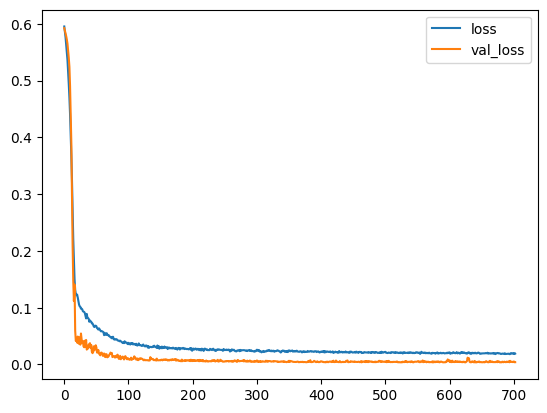

In [28]:
history_df.plot()


In [29]:
# Calculate the RMSE on the training set
y_pred = model.predict(X)
from sklearn.metrics import mean_squared_error
print('RMSE on the training set:', np.sqrt(mean_squared_error(y, y_pred)))

46/46 [==============================] - 1s 3ms/step
RMSE on the training set: 0.1731860516742884


In [30]:
# Predict on the test set
y_pred = model.predict(test)
y_pred = np.expm1(y_pred)
y_pred = pd.DataFrame(y_pred, index=test_id, columns=["SalePrice"])
y_pred.to_csv('submission_new.csv')

46/46 [==============================] - 0s 2ms/step


In [58]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

xgb_model = XGBRegressor()
xgb_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [59]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)

In [60]:
from sklearn.metrics import mean_squared_error

In [67]:
params = {
    "learning_rate":[0.01,0.02,0.03],
    "max_depth":[2,4,6,8,10],
    "n_estimators":[100,200,300,400,500,600,700,800,1000],
}

grid_dt = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=params,
    scoring=mean_squared_error,
    cv=10,
    n_jobs=1
)

In [68]:
grid_dt.fit(X,y)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_jobs=1,
                   param_distributions={'learning_rate': [0.01, 0.02, 0.03],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         1000]},
                   scoring=<function mean_squared_error at 0x000002232AA0C040>)

In [69]:
best_xgb = grid_dt.best_estimator_
best_xgb

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [76]:
xgb4 = XGBRegressor(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb4.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=6,
             missing=nan, monotone_constraints='()', n_estimators=5000,
             n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto',
             random_state=27, reg_alpha=0.005, ...)

In [77]:
# Calculate the RMSE on the training set
y_pred = xgb4.predict(X)
from sklearn.metrics import mean_squared_error
print('RMSE on the training set:', np.sqrt(mean_squared_error(y, y_pred)))

RMSE on the training set: 0.026312782677150193


In [79]:
# Predict on the test set
y_pred = xgb4.predict(test)
y_pred = np.expm1(y_pred)
y_pred = pd.DataFrame(y_pred, index=test_id, columns=["SalePrice"])
y_pred.to_csv('submission_new.csv')